# Some example SDFITSIO operations with masking


In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


import sdfitsio as sdf
from importlib import reload
reload(sdf);

Create a masked array 'a' with a typical LMT structure

In [2]:
ntime = 1000
nbeam = 16
npol = 2
nband = 6
nchan = 256

adim=(ntime,nbeam,npol,nband,nchan)
%time a = sdf.gen_data(adim)

print('Size of data',sdf.dimsize(adim))

looping data2 + g
CPU times: user 3.44 s, sys: 95.6 ms, total: 3.53 s
Wall time: 3.53 s
Size of data 49152000


Write it as SDFITS

In [3]:
%time sdf.my_write_sdfits('junk.fits',a)

SHAPE= (1000, 16, 2, 6, 256)
NAXIS2= 192000
NCHAN= 256
All data good, no masking operation needed
(192000,)
(192000, 256)
Written junk.fits
CPU times: user 847 ms, sys: 482 ms, total: 1.33 s
Wall time: 1.33 s


Set up a masking operation. Low level method. Any dimensions skipped, imply all elements are selected, i.e. [:]

In [4]:
mask = {}
mask[0] = '0:110'     # time 
#mask[1] = '3'        # beam
#mask[2] = '0'        # pol
#mask[3] = '4'        # band
mask[4] = '81:83'    # chan


In [5]:
%time sdf.data_mask(a, mask)


DATA_MASK:  {0: '0:110', 4: '81:83'}
CMD: data.mask[0:110,:,:,:,81:83] = True
CPU times: user 2.63 ms, sys: 339 µs, total: 2.97 ms
Wall time: 1.35 ms


Report what fraction was masked

In [6]:
%time sdf.data_masked(a)

data_masked: 42240 / 49152000 = 0.0859375%
CPU times: user 140 ms, sys: 12.4 ms, total: 153 ms
Wall time: 151 ms


In [7]:
%time sdf.my_write_sdfits('junk_masked.fits',a)

SHAPE= (1000, 16, 2, 6, 256)
NAXIS2= 192000
NCHAN= 256
Some data masked, using a copy to write
(192000,)
(192000, 256)
Written junk_masked.fits
CPU times: user 663 ms, sys: 537 ms, total: 1.2 s
Wall time: 1.2 s


Read back the original unmasked

In [8]:
%time b=sdf.my_read('junk.fits')

File:      junk.fits
Size:      4 cols x 192000 rows
Telescope: LMT/GTM
Object:    ['NOISE']
DateObs:   0.0
DIMS2: (1000, 16, 2, 6, 256)
(192000, 256)
(1000, 16, 2, 6, 256)
Data.sum() =  5802967.0
CPU times: user 304 ms, sys: 23.9 ms, total: 328 ms
Wall time: 323 ms


In [9]:
b.shape

(1000, 16, 2, 6, 256)

In [10]:
%time sdf.data_masked(b)

data_masked: 0 / 49152000 = 0%
CPU times: user 137 ms, sys: 12.9 ms, total: 150 ms
Wall time: 148 ms


In [11]:
%time c = sdf.my_read('junk_masked.fits')

File:      junk_masked.fits
Size:      4 cols x 192000 rows
Telescope: LMT/GTM
Object:    ['NOISE']
DateObs:   0.0
DIMS2: (1000, 16, 2, 6, 256)
(192000, 256)
(1000, 16, 2, 6, 256)
Data.sum() =  nan
CPU times: user 292 ms, sys: 31.9 ms, total: 324 ms
Wall time: 322 ms


In [12]:
%time sdf.data_masked(c)

data_masked: 42240 / 49152000 = 0.0859375%
CPU times: user 143 ms, sys: 8.51 ms, total: 152 ms
Wall time: 152 ms


Indeed, the masking have now been applied (as NaN) in the SDFITS file. masks cannot be undone here, since we did not save the masks. Thus users are encouraged to save them seperately.

0.8812554542059228 0.009143112821694374 96.38461992013472 438.1780460041329


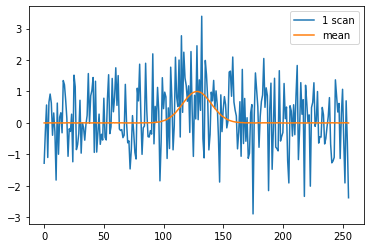

In [13]:
x=np.arange(nchan)
y=b[0,0,0,0,:]
z=b.mean(axis=0).mean(axis=0).mean(axis=0).mean(axis=0)
plt.plot(x,y,label='1 scan')
plt.plot(x,z,label='stacked')
plt.legend()
ys=y[:100].std()
zs=z[:100].std()
bdims=b.shape
print(ys,zs,ys/zs,np.sqrt(sdf.dimsize(bdims[:-1])))

